In [22]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from pickle import dump
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    mean_squared_error
)

In [23]:
main_df = pd.read_csv('../data/processed/PROCESSED_DF.csv')
main_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,89,66,23,94,28.1,0.167,21,0
1,137,40,35,168,43.1,2.288,33,1
2,78,50,32,88,31.0,0.248,26,1
3,166,72,19,175,25.8,0.587,51,1
4,115,70,30,96,34.6,0.529,32,1


In [24]:
X = main_df.drop(columns=["Outcome"])
y = main_df["Outcome"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Random Forest</h3>

In [26]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

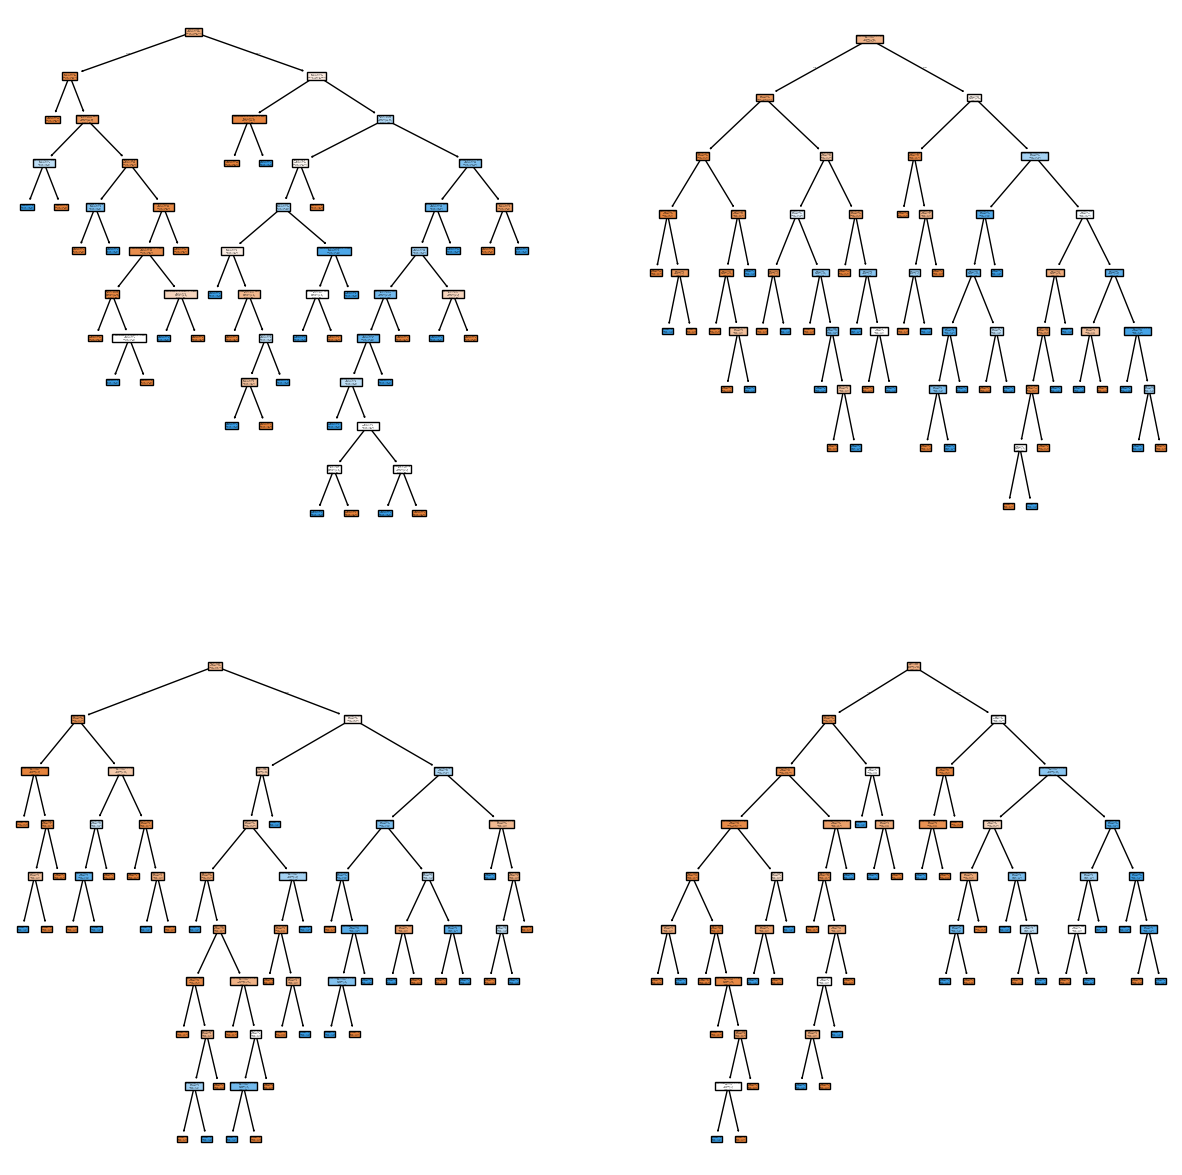

In [27]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

features = ['No', 'Yes']

plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = features, filled = True)
plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = features, filled = True)
plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = features, filled = True)
plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = features, filled = True)

plt.show()

In [28]:
# Predict
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Metrics test
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test, average='micro')
precision_test = precision_score(y_test, y_pred_test, average='micro')
recall_test = recall_score(y_test, y_pred_test, average='micro')
squared_error_test = mean_squared_error(y_test, y_pred_test)

# Metrics train
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
squared_error_train = mean_squared_error(y_train, y_pred_train)

# Result
print(f"Accuracy (test): {accuracy_test}")
print(f"F1 Score (test): {f1_score_test}")
print(f"Precision (test): {precision_test}")
print(f"Recall (test): {recall_test}")
print(f"Mean Squared Error (test): {squared_error_test}")

print(f"\nAccuracy (train): {accuracy_train}")
print(f"F1 Score (train): {f1_score_train}")
print(f"Precision (train): {precision_train}")
print(f"Recall (train): {recall_train}")
print(f"Mean Squared Error (train): {squared_error_train}")

Accuracy (test): 0.7333333333333333
F1 Score (test): 0.7333333333333333
Precision (test): 0.7333333333333333
Recall (test): 0.7333333333333333
Mean Squared Error (test): 0.26666666666666666

Accuracy (train): 1.0
F1 Score (train): 1.0
Precision (train): 1.0
Recall (train): 1.0
Mean Squared Error (train): 0.0


In [29]:
# Optimize model
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

Mejores parámetros: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [30]:
# Train the model
model.fit(X_train, y_train)

# Predict
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Metrics test
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test, average='micro')
precision_test = precision_score(y_test, y_pred_test, average='micro')
recall_test = recall_score(y_test, y_pred_test, average='micro')
squared_error_test = mean_squared_error(y_test, y_pred_test)

# Metrics train
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
squared_error_train = mean_squared_error(y_train, y_pred_train)

# Result
print(f"Accuracy (test): {accuracy_test}")
print(f"F1 Score (test): {f1_score_test}")
print(f"Precision (test): {precision_test}")
print(f"Recall (test): {recall_test}")
print(f"Mean Squared Error (test): {squared_error_test}")

print(f"\nAccuracy (train): {accuracy_train}")
print(f"F1 Score (train): {f1_score_train}")
print(f"Precision (train): {precision_train}")
print(f"Recall (train): {recall_train}")
print(f"Mean Squared Error (train): {squared_error_train}")

Accuracy (test): 0.7666666666666667
F1 Score (test): 0.7666666666666667
Precision (test): 0.7666666666666667
Recall (test): 0.7666666666666667
Mean Squared Error (test): 0.23333333333333334

Accuracy (train): 1.0
F1 Score (train): 1.0
Precision (train): 1.0
Recall (train): 1.0
Mean Squared Error (train): 0.0


In [31]:
dump(model, open("../models/random_forest_classifier_default_42.sav", "wb"))